In [57]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import copy
from sklearn.model_selection import train_test_split

# for import data
import torchvision
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [58]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [59]:
cdata = torchvision.datasets.EMNIST(root = 'emnist', split = 'letters', download = True)


In [60]:
print(cdata.classes)
print(str(len(cdata.classes)) + 'classes')

print('\nData Size')
print(cdata.data.shape)

images = cdata.data.view([124800, 1, 28, 28]).float()
print('\n Tensor data: ')
print(images.shape)

['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27classes

Data Size
torch.Size([124800, 28, 28])

 Tensor data: 
torch.Size([124800, 1, 28, 28])


In [61]:
# class 'N/A' doesnt exist in data
print(torch.sum(cdata.targets == 0))

torch.unique(cdata.targets)

tensor(0)


tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26])

In [62]:
cdata.class_to_idx

{'N/A': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [71]:
letterCategories = cdata.classes[1:]

labels = copy.deepcopy(cdata.targets) - 1
print(labels.shape)

print(torch.sum(labels == 0))
torch.unique(labels)
labels = labels[:,None]

torch.Size([124800])
tensor(4800)


In [72]:
labels.shape

torch.Size([124800, 1])

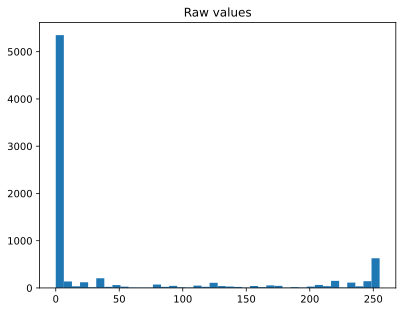

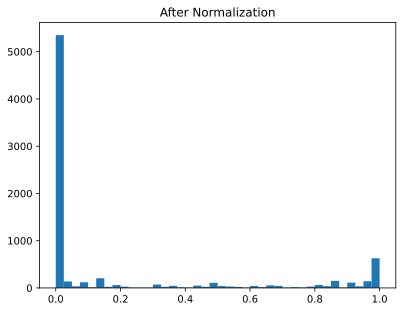

In [64]:
plt.hist(images[:10, :,:,:].view(1, -1).detach(), 40)
plt.title('Raw values')
plt.show()

# yarp
images /= torch.max(images)
plt.title('After Normalization')
plt.hist(images[:10, :,:,:].view(1, -1).detach(), 40)
plt.show()

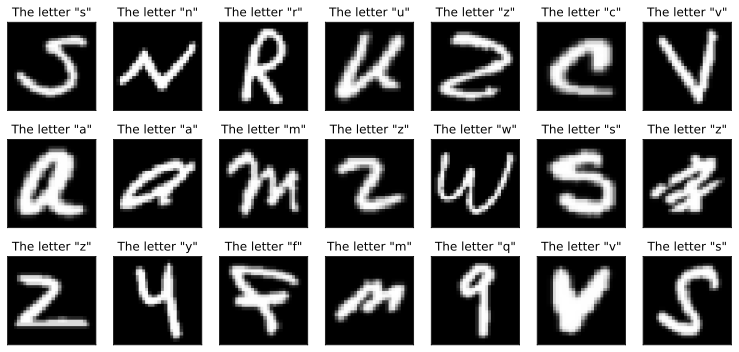

In [65]:
fig, axs = plt.subplots(3, 7, figsize = (13, 6))

for i, ax in enumerate(axs.flatten()):

    whichpic = np.random.randint(images.shape[0])

    I = np.squeeze(images[whichpic, :,:])
    letter = letterCategories[labels[whichpic]]

    # visualize
    ax.imshow(I.T, cmap = 'gray')
    ax.set_title('The letter "%s"'%letter)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [73]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size = .1)
train_data1 = np.zeros(train_data.shape)
test_data1 = np.zeros(test_data.shape)
for i in range(len(train_data)):
    train_data1[i, 0,:,:] = train_data[i, 0,:,:].T
for i in range(len(test_data)):
    test_data1[i, 0,:,:] = test_data[i, 0,:,:].T

train_dataset = TensorDataset(train_data1, train_labels)
test_dataset = TensorDataset(test_data1, test_labels)

batchsize = 32
train_loader = DataLoader(train_dataset, batch_size = batchsize, shuffle = True )
test_loader = DataLoader(train_dataset, batch_size = test_dataset.tensors[0].shape[0])

TypeError: 'int' object is not callable

In [45]:
test_dataset.tensors[0].shape

torch.Size([12480, 1, 28, 28])

In [67]:
train_labels.shape

torch.Size([112320])

In [56]:
test_data1.shape



(12480, 1, 28, 28)